* https://www.askpython.com/python/examples/k-means-clustering-from-scratch

In [29]:
#Loading the required modules
 
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
#Defining our function 
def kmeans(X, k, no_of_iterations):
    # random assign group
    idx = np.random.choice(len(X), k, replace=False)
    print('idx: ', idx)
    
    #Randomly choosing Centroids 
    centroids = X[idx, :] #Step 1
    print('centroids: ', centroids, centroids.shape)
     
    #finding the distance between centroids and all the data points
    distances = cdist(X, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    # np.argmin return index with min value 
    points = np.array([np.argmin(dis) for dis in distances]) #Step 3
    print('points: ', points)
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = X[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(X, centroids ,'euclidean')
        points = np.array([np.argmin(dis) for dis in distances])
         
    return points 

idx:  [1526 1304 1627]
centroids:  [[ 18.59252093  -7.40441918]
 [ -8.85299891 -17.23289433]
 [  1.54487196 -14.14462535]] (3, 2)
points:  [0 2 2 ... 0 2 2]


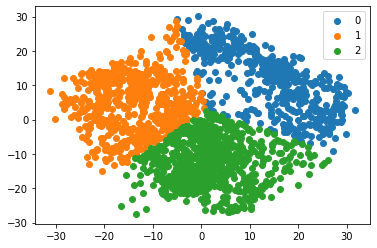

In [30]:
#Load Data
data = load_digits().data
pca = PCA(2)
  
#Transform the data
df = pca.fit_transform(data)
 
#Applying our function
label = kmeans(df, 3, 1000)
 
#Visualize the results
 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [28]:
a = np.array([1, 2])
b = np.array([2, 3])
c = np.array([3, 4])
np.vstack([a, b, c])

array([[1, 2],
       [2, 3],
       [3, 4]])

In [35]:
import numpy as np
  
# intializing points in
# numpy arrays
point1 = np.array((1, 2, 3))
point2 = np.array((1, 1, 1))
  
# calculating Euclidean distance
# using linalg.norm()
dist = np.linalg.norm(point1 - point2)
  
# printing Euclidean distance
print(dist)

2.23606797749979


### 这个好
* https://pythonprogramming.net/k-means-from-scratch-2-machine-learning-tutorial/?completed=/k-means-from-scratch-machine-learning-tutorial/

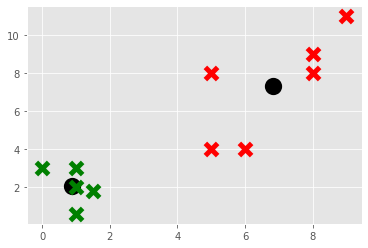

In [36]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [1,3],
              [8,9],
              [0,3],
              [5,4],
              [6,4],])

##plt.scatter(X[:,0], X[:,1], s=150)
##plt.show()

colors = 10*["g","r","c","b","k"]


class K_Means:
    def __init__(self, k=2, max_iter=300):
        self.k = k
        self.max_iter = max_iter

    def fit(self, X):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = X[i]

        for i in range(self.max_iter):
            self.classes = {}

            for i in range(self.k):
                self.classes[i] = []

            # iterate each data to assign class
            for xi in X:
                # using linalg.norm() to find Euclidean distance: np.linalg.norm(point1 - point2)
                distances = [np.linalg.norm(xi-self.centroids[centroid]) for centroid in self.centroids]

                # find the closed centroid, assign as class
                c = np.argmin(distances)
                self.classes[c].append(xi)

            # update the centroids based on new classes
            for c in self.classes:
                self.centroids[c] = np.mean(self.classes[c],axis=0)


    def predict(self, new_X):
        distances = [np.linalg.norm(new_X-self.centroids[centroid]) for centroid in self.centroids]
        c = np.argmin(distances)
        return c


clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for c in clf.classes:
    color = colors[c]
    for featureset in clf.classes[c]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

plt.show()